In [1]:
import pandas as pd
import numpy as np

In [114]:
df = pd.read_csv('C:\\Users\\Cees\\Downloads\\aggregated_adm2.csv', names=['Name',
                                                                            'Date',
                                                                            'Precipitation1',
                                                                            'Precipitation2',
                                                                            'LST Day',
                                                                            'LST Night',
                                                                            'Vegetation Index',
                                                                            'Specific humidity',
                                                                            'Near surface air temperature',
                                                                            'Near surface wind speed'])

In [115]:
grouped = df.groupby(['Name'])

In [116]:
admNames =df['Name'].unique().tolist()
#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in admNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.Name == key]

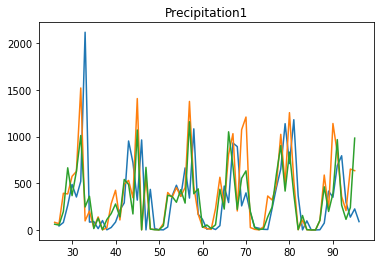

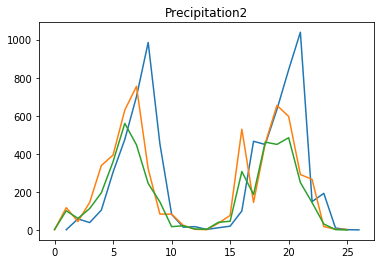

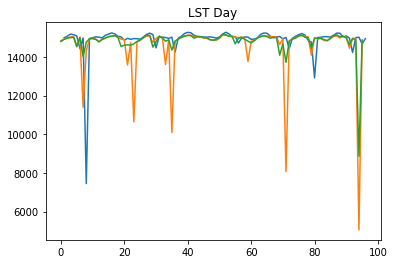

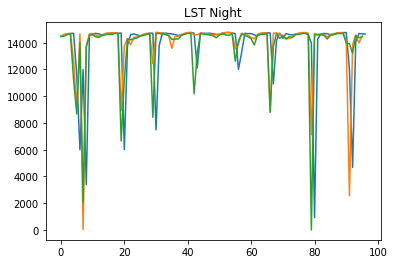

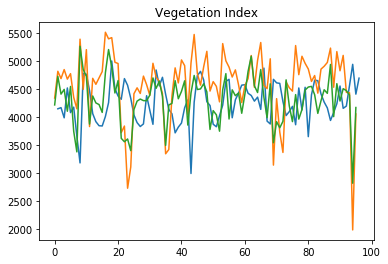

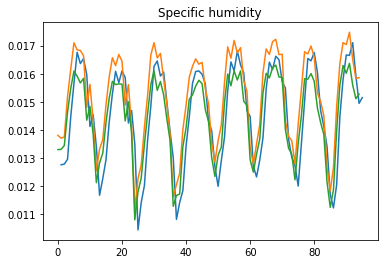

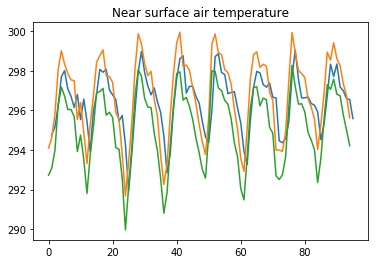

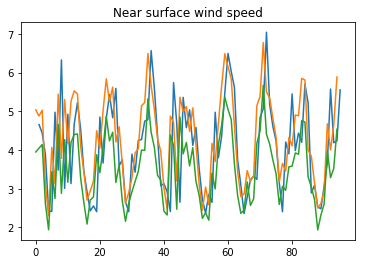

In [84]:
for feature in DataFrameDict['Abra'].columns:
    try:
        plt.plot(DataFrameDict['Abra'][feature].astype(float))
        plt.plot(DataFrameDict['Apayao'][feature].astype(float).reset_index(drop=True))
        plt.plot(DataFrameDict['Kalinga'][feature].astype(float).reset_index(drop=True))
        plt.title(feature)
        plt.show()
    except:
        pass

In [85]:
df_ovitrap = pd.read_csv("C:\\Users\\Cees\\Downloads\\ovitrap_data_aggregated_per_month_per_province.csv")

In [92]:
df = df_ovitrap.loc[df_ovitrap['adm_level'] == 'Albay']

In [97]:
SARIMA_test = df.loc[:1809]

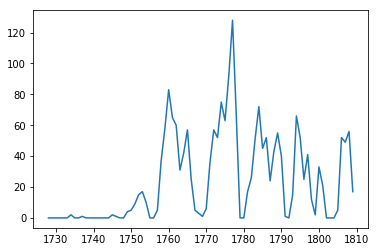

In [99]:
plt.plot(SARIMA_test['count_ovi'].astype(float))

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
statsmodels.tsa.stattools.acf(SARIMA_test['count_ovi'].astype(float), unbiased=False, nlags=20, qstat=False, fft=None, alpha=None, missing='none')

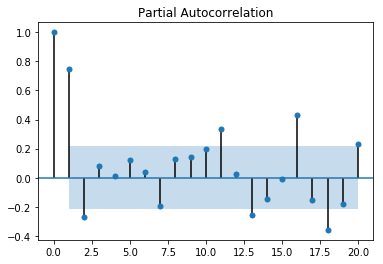

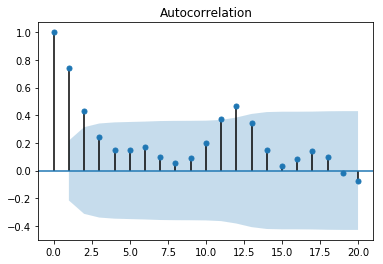

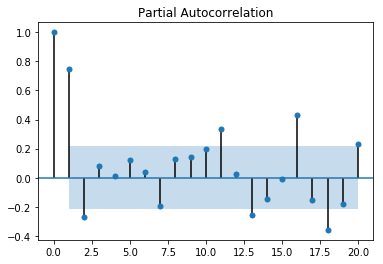

In [111]:
plot_acf(SARIMA_test['count_ovi'].astype(float), lags=20)
plot_pacf(SARIMA_test['count_ovi'].astype(float), lags=20)

In [155]:
import statsmodels.api as sm
exog = DataFrameDict['Albay']
exog = exog.loc[385:466].iloc[:, 4:10].astype(float).reset_index(drop=True)
mod = sm.tsa.statespace.SARIMAX(SARIMA_test['count_ovi'].reset_index(drop=True), exog=exog[['Specific humidity', 'Near surface wind speed']], order=(2,0,1), seasonal_order=(1,0,1, 12))
res = mod.fit(disp=False)
print(res.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          count_ovi   No. Observations:                   82
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -346.730
Date:                            Mon, 13 Jan 2020   AIC                            709.460
Time:                                    14:41:17   BIC                            728.714
Sample:                                         0   HQIC                           717.190
                                             - 82                                         
Covariance Type:                              opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Specific humidity         422.0731   1121.219      0.376      0.707   -1775.476    2619.